# Graphs for fast sorting on GPU

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [173]:
def load_file(filename):
    return np.genfromtxt(filename,delimiter=",")

In [185]:
directory = "A100-data"
data = []
for filename in sorted(os.listdir(directory)):
    print (filename)
    data.append(load_file(f"{directory}/{filename}"))


B-1-4-256.csv
B-4-4-256.csv
B-8-4-256.csv
E-4-1-256.csv
E-4-4-256.csv
E-4-8-256.csv
TS-4-4-1024.csv
TS-4-4-256.csv
TS-4-4-512.csv
TS-4-4-768.csv
u16-8-4-512.csv
u16-fut.csv
u32-8-4-512.csv
u32-fut.csv
u64-8-4-512.csv
u64-fut.csv
u8-8-4-512.csv
u8-fut.csv


In [175]:
#filename = "u32-8-4-512.csv"
#loadData = np.genfromtxt(filename,delimiter=",")


In [176]:
B14256 = load_file("A100-data/B-1-4-256.csv")

In [177]:
allds = np.array([100000,
250000,
500000,
750000,
1000000,
2500000,
5000000,
7500000,
10000000,
25000000,
50000000,
75000000,
100000000,
250000000,
500000000,
750000000,
1000000000])

In [178]:
def plot(xs,ys,B=4, E=4,TS=256):
    plt.scatter(xs,ys,label=f"B = {B} , E = {E} , TS = {TS}")
    plt.plot(xs,ys)

In [179]:
#Baseline Bs, Es, TSs
#Bs = np.ones(len(val)-1)*4
#Es = np.ones(len(val)-1)*4
#TSs = np.ones(len(val)-1)*256
def plots(val,name,Bs=np.ones(4)*4,Es=np.ones(4)*4,TSs=np.ones(3)*256,saved = True):
    for i in range(len(TSs)):
        plot(val[0][0],val[i][1],B=Bs[i], E=Es[i],TS=TSs[i])
    plt.legend()
    plt.title(f"Performance for {name}")
    plt.xlabel("Size of array")
    plt.ylabel("Time in microseconds")
    if saved:
        plt.savefig(f"images/{name}.pdf")
    plt.show()


In [180]:
def plot_cub(data,fut,name,types):
    plt.scatter(data[0],data[1],label=f"Our solution")
    plt.plot(data[0],data[1])
    plt.scatter(data[0],data[2],label=f"Cub solution")
    plt.plot(data[0],data[2])
    plt.scatter(data[0],fut[1],label=f"Futhark solution")
    plt.plot(data[0],fut[1])
    plt.legend()
    plt.title(f"Performance for {name}")
    plt.xlabel("Size of array")
    plt.ylabel("Time in microseconds")
    plt.savefig(f"images/{name}.pdf")
    plt.show()
    

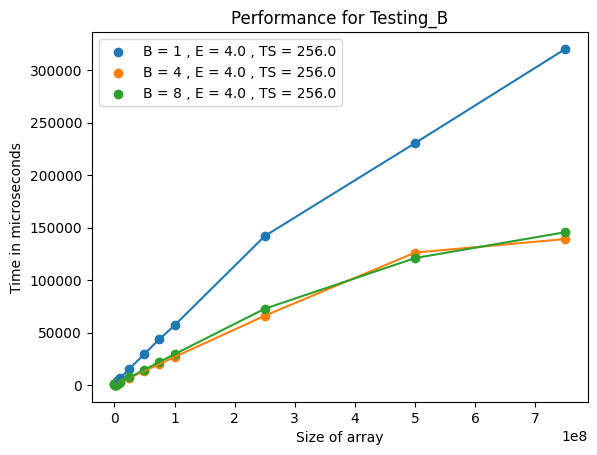

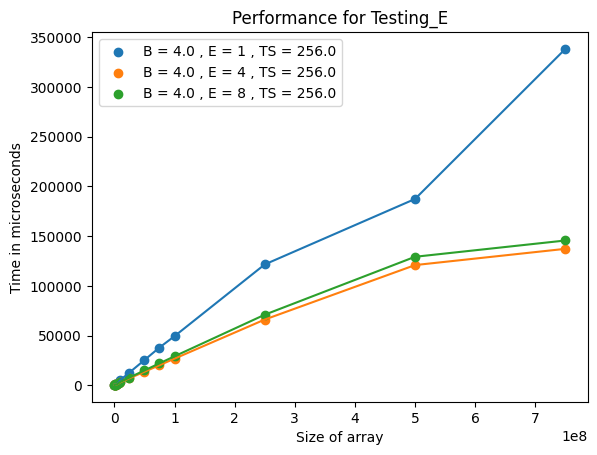

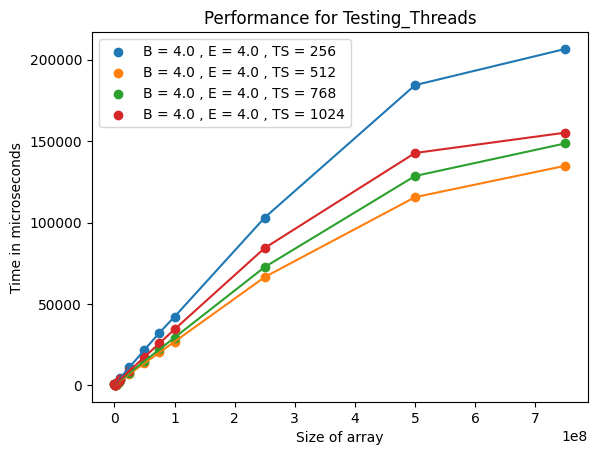

In [181]:
# Set the Bs, Es, or TSs array to the correct value before plotting
plots(data[0:3],"Testing_B", Bs=np.array([1,4,8]))
plots(data[3:6],"Testing_E", Es=np.array([1,4,8]))
plots(data[6:10],"Testing_Threads", TSs=np.array([256,512,768,1024]))
types = ["u8","u16","u32","u64"]


In [182]:
data[15].shape

(2, 16)

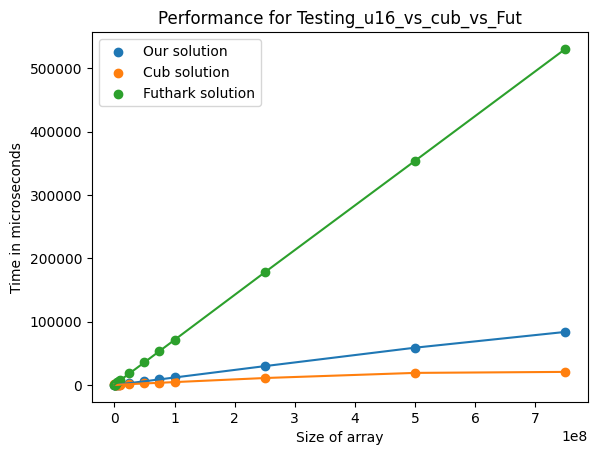

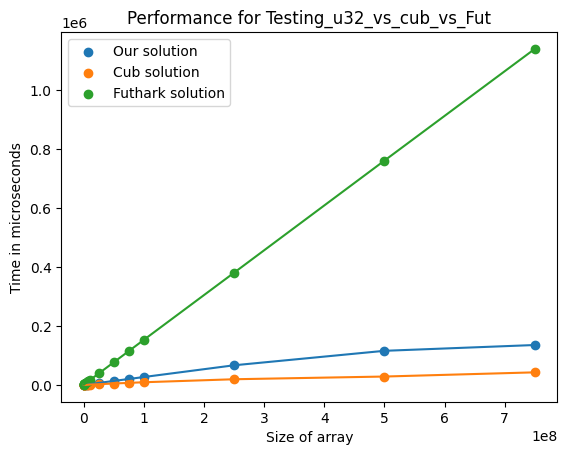

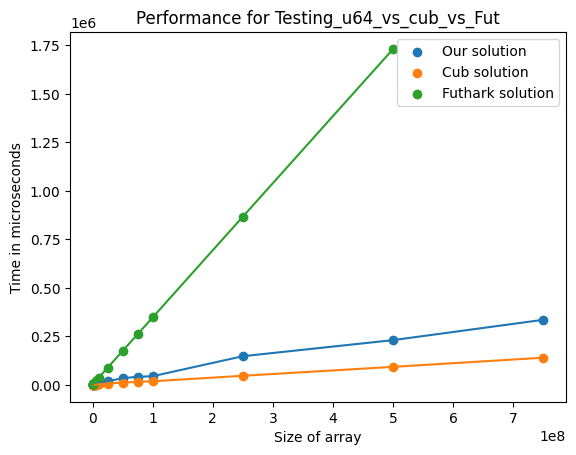

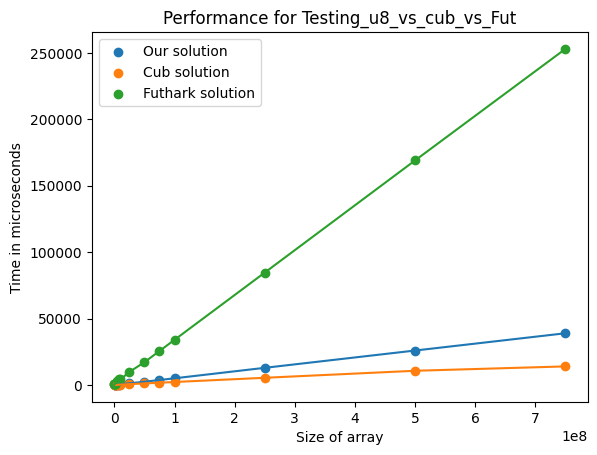

In [186]:
plot_cub(data[10],data[11],"Testing_u16_vs_cub_vs_Fut",types = "u16")
plot_cub(data[12],data[13],"Testing_u32_vs_cub_vs_Fut",types = "u32")
plot_cub(data[14],data[15],"Testing_u64_vs_cub_vs_Fut",types = "u64")
plot_cub(data[16],data[17],"Testing_u8_vs_cub_vs_Fut",types = "u8")

In [190]:
print(f"For u16 the factor is: {data[10][1][-1]/data[10][2][-1]}")
print(f"For u32 the factor is: {data[12][1][-1]/data[12][2][-1]}")
print(f"For u64 the factor is: {data[14][1][-1]/data[14][2][-1]}")
print(f"For u8  the factor is: {data[16][1][-1]/data[16][2][-1]}")

For u16 the factor is: 4.039617223036004
For u32 the factor is: 3.1640115308754364
For u64 the factor is: 2.387712045008951
For u8  the factor is: 2.7781953010802525
